
# <font color="Blue">**[2일차 오후] 학습데이터 확보 및 객체인식을 위한 학습 모델링** <font>

##**[사전 준비 사항]**
- roboflow라는 데이터 제공 사이트로부터 데이터를 받기 위해 구글 ID가 있어야 합니다.
- 1일차 CCTV영상들에서 추출한 이미지데이터(CCTV/image30 폴더)가 필요합니다.
- 1일차 CCTV영상데이터가 필요합니다.(car_bike.mp4)

##**[2일차오후의 목적]**
- Object Detection 학습을 위해 이미 만들어진 라벨링된 이미지 데이터를 수집할수 있다.
- 수집한 데이터를 가지고 Yolo 기반 모델 학습을 할수 있다.
- 학습한 모델을 활용하여 내가 원하는 영상, 이미지의 객체를 Detection할수 있다.

##**[진행방법]**
- 오전에 실습한 코드를 활용하여 직접 진행합니다.(스스로 해본 후에 조별로 진행)

### **[오후 할일들]**
- (1단계) CCTV영상에서 차량 객체를 인식하는 Yolo모델을 학습하고 적용해 보기(개별)
- (2단계)CCTV영상에서 차량 객체를 인식하는 Yolo모델을 학습하고 적용해 보기(조별)

### **[2일차 최종제출물]**
- 2단계때 완성된 **조의 파이썬 파일(.ipynb)과 객체가 탐지된 파일(car_detected.mp4)을 조별로** 제출 부탁드립니다.

----

# <font color="red">**[미션] Roboflow에서 데이터셋을 가져와서 Yolov5로 학습하신 후 최종 CCTV동영상에 적용한 영상을 제작해 주십시오**

- https://universe.roboflow.com/kurs-w4uhs/exp2-livtl/dataset/2 에 들어가서 API활용 다운로드 받아서 진행해주시면 됩니다.
- 적용할 CCTV 동영상: /content/drive/MyDrive/CCTV/tutorial/car_bike.mp4  입니다.




# <font color="Blue">__[실습 1] Roboflow를 통한 기 레이블링된 이미지 데이터셋 가져오기__<font>
- Roboflow란? <br>
Roboflow는 컴퓨터 비전(Computer Vision) 기술을 이용해 다양한 애플리케이션을 만들 수 있도록 지원해주는 서비스입니다. <br>
Roboflow는 다양한 무료 데이터셋을 지원하고 있다는 특징이 있는데요, 사이트에 접속한 뒤에 다양한 무료 데이터셋을 다운로드할 수 있습니다.

## **1. 환경 설정하기**


- 패스설정하고 Yolov5 설치

### 1) 구글 드라이브 연결하기


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2) 경로 확인하기

In [2]:
import os

ROOT_PATH = "/content/drive/MyDrive/Deep_Learning_KT/project/sample/car_bike"
os.path.exists(ROOT_PATH)

True

## **2. 데이터 불러오기**




* roboflow 사이트 접속하여 Public 데이터셋 받아오기
> https://universe.roboflow.com/<br>
> ① roboflow 라이브러리 설치
```# 코드로 형식 지정됨
!pip install roboflow
```
> ② roboflow 데이터셋 다운로드<br>
> [방법] - 다운로드 클릭하여 코드 다운로드 하기
```# 코드로 형식 지정됨
from roboflow import Roboflow
rf = Roboflow(api_key="APIkey입력")
project = rf.workspace().project("프로젝트명입력")
dataset = project.version(버전입력).download("yolov5")
```


- 1) roboflow로 로그인 (구글 아이디 활용 로그인)
- 2) "car detection" 링크로 유입
  -  https://universe.roboflow.com/kurs-w4uhs/exp2-livtl/dataset/2 로 유입
- 3) 다운로드 API 코드 가져오기
  - Download 버튼 클릭
  - YOLOv5 PyTorch 양식으로 지정, show downlad Code로 쥬피터노트북 코드 찾기. 해당 코드 복사하여 코랩 코드에 넣어서 실행




<font color="red"> **[미션 1] roboflow 사이트에 접속하여 데이터셋을 다운로드하세요.**
 </font>
 - 위의 설명에 따라 코드를 가지고 오세요
 - 데이터셋은 /content 에 복사해야 합니다.

In [3]:
# 현재 작업 경로 확인하기
%pwd

'/content'

In [ ]:
!pip install roboflow



In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="C7nFXqWFSI72ARYKZcrq")
project = rf.workspace("df-t1w83").project("car_bike_detection_5")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to car_bike_detection_5조-1 in yolov5pytorch:: 100%|██████████| 271/271 [00:00<00:00, 6519.32it/s]


- **인스톨 이후 확인사항**
 - (1) 코랩의 옆 디렉토리에서 데이터 폴더 확인
 - (2) test폴더 구조 확인(images(이미지파일), labels(객체라벨데이터))
 - (3) train폴더 구조 확인(동일)
 - (4) data.yaml 파일 확인, (클래스명칭, 클래스수, 학습 및 테스트 이미지 리스트가 있는 파일 지정)

## **3. 데이터셋 확인하기**


* 모델링을 위한 Train Data(학습)와 Test 데이터(검증) 확인하는 단계
* Yolov5를 위한 데이터셋은 test와 train으로 구분되어 있음
* 각 폴더 밑에는 이미지 데이타가 있는 images와 객체의 좌표와 객체의 클래스를 명시한 각 이미지별 파일이 있는 labels 폴더 가 있다
* data.yaml 파일에는 클레스 수, 클래스 이름, 폴더 경로가 들어가 있어. 향후 yolov5를 시행할 때 해당 파일을 활용한다.

>[위치]
>> 테스트데이터 장소: 데이터명>test>images,   데이터명>test>labels<br>
>> 학습데이터 장소: 데이터명> train> images, 데이터명> train>images<br>
>> Yolov5를 위한 데이터 설정 파일 장소: 데이터명> data.yaml<br>

* 폴더 구조를 불러올 때 쓰는 glob 라이브러리 활용
* 다운로드 받은 데이터의 경로를 미리 변수로 설정해서 지정해 두시면 편리합니다.

> [방법]
>> DATA_PATH = "/content/EXP2-2/" <br>
>> TRAIN_PATH = "/content/EXP2-2/train"<br>
>> VALIDATION_PATH = "/content/EXP2-2/test"<br>



<font color="red">**[미션2] 테스트 파일과 학습 파일 리스트 전체 Path를 저장하고 Train Data와 Test Data 이미지 개수를 확인하세요.**</font>
- 학습데이터/테스트데이터 전체경로를 포함한 이미지 리스트를 glob함수를 통해 저장하시기 바랍니다.
  - train_image_list = glob.glob(TRAIN_PATH + "/images/*.jpg") 형태
- 전체경로에 대한 리스트를 만드는 이유는 Yolov5에서 학습, 테스트 경로 파일을 따로 요구하기 때문입니다.

In [5]:
# 필요 라이브러리 불러오기
import glob

In [6]:
DATA_PATH = "/content/car_bike_detection_5조-1"
TRAIN_PATH = "/content/car_bike_detection_5조-1/train"
VALIDATION_PATH =  "/content/car_bike_detection_5조-1/valid"

train_image_list = glob.glob(TRAIN_PATH + '/images/*.jpg')
validation_image_list = glob.glob(VALIDATION_PATH + '/images/*.jpg')


In [7]:
#전체 갯수 확인하기
print(len(train_image_list))
print(len(validation_image_list))

99
29


---

## **4.학습이미지, 테스트이미지 리스트 파일 생성하기**
- [목적] yolov5가 학습.테스트용이미지 경로가 어디있는지 알수 있게 하기 위함

<font color="red">**[미션 3] train, validation 이미지들의 경로를 txt 파일로 저장하기**</font>
- yolov5 학습을 위해 data.yaml 파일 내
train, val의 값을 이미지 파일들의 경로를 저장한 .txt 파일로 저장이 필요합니다.
- 학습이미지 리스트(train_image_list)를 train.txt에, 테스트이미지 리스트(validation_image_list)를 validation.txt에 저장하세요

In [8]:
# "EXP2-2" 폴더(=DATA_PATH)에 train.txt 파일을 생성 한 후에 앞서 저장된 train_image_list 파일 리스트를 저장하세요
with open(DATA_PATH + '/train.txt', 'w') as f:
  f.write('\n'.join(train_image_list))

with open(DATA_PATH + '/validation.txt', 'w') as f:
  f.write('\n'.join(validation_image_list))

In [9]:
# [참조] 파일에의 리스트를 확인 하는 다른 방법
with open(DATA_PATH + '/train.txt', 'r') as f:
  a = f.readlines()
  print(a)

['/content/car_bike_detection_5조-1/train/images/CCTV-13_402_jpg.rf.0f95321666322cd95eefebc378f4f62f.jpg\n', '/content/car_bike_detection_5조-1/train/images/CCTV-1_28_jpg.rf.7d47796b78ce44a676a1c9987a45e57c.jpg\n', '/content/car_bike_detection_5조-1/train/images/CCTV-6_78_jpg.rf.4c66c62f7c9c86957562cc9c920fe271.jpg\n', '/content/car_bike_detection_5조-1/train/images/CCTV-7_135_jpg.rf.fdc55a9fe5e3c37a86c2cb220388a469.jpg\n', '/content/car_bike_detection_5조-1/train/images/CCTV-9_111_jpg.rf.f486f45f9708c31e8b2484dffed3fc41.jpg\n', '/content/car_bike_detection_5조-1/train/images/CCTV-9_74_jpg.rf.625908a731b6cc02d18b4b381e02839b.jpg\n', '/content/car_bike_detection_5조-1/train/images/CCTV-4_196_jpg.rf.9b7c52bf34fe56e77b47cb8b79e3ce7a.jpg\n', '/content/car_bike_detection_5조-1/train/images/CCTV-3_128_jpg.rf.fd2c866a9264b2deea005035ab920fc0.jpg\n', '/content/car_bike_detection_5조-1/train/images/CCTV-7_108_jpg.rf.eacea61737b90a20f100edc0ff18cecb.jpg\n', '/content/car_bike_detection_5조-1/train/images/

---

## **5.환경정보가 들어간 데이터셋인 data.yaml 데이터 설정 파일 수정하기**


* Yaml이란? xml과 json 포맷과 같이 타 시스템 간에 데이터를 주고받을 때 약속된 포맷(규칙)이 정의되어있는 파일 형식으로 환경 정보가 포함되어 있습니다.<br>
 - https://abluesnake.tistory.com/128<br>

* 환경 정도는 다음과 같이 들어가 있습니다.(names, nc, train과 val)

  - [정보] ① names : class이름, ② nc : class종류수 ③ train/validation 경로

  - **여기서 주의 사항은 train/val 경로는 Full Path가 들어간 이미지 리스트 파일(train.txt, validation.txt)로 연결이 되어야 합니다. 그래서, 앞서 생성된 리스트 파일이 필요합니다..**

```
names:
- cars
- motorbike
nc: 2
roboflow:
  license: CC BY 4.0
  project: exp2-livtl
  url: https://universe.roboflow.com/kurs-w4uhs/exp2-livtl/dataset/2
  version: 2
  workspace: kurs-w4uhs
test: ../test/images
train: EXP2-2/train/images
val: EXP2-2/valid/images

```

- 이 내용과 labels의 내용을 보면, labels의 첫번째 컬럼의 값이 0이면 cars, 1이면 motorbike입니다.

<font color="red">**[미션4] data.yaml 파일의 정보를 data의 변수에 딕셔너리형태로 저장해 보세요**</font>
- Python의 YAML 라이브러리를 이용하여 Yaml 파일을 파싱하여 파이썬 객체로 읽어 오세요. (딕셔너리 형태로 가지고 오기)
- Yolov5를 쓰기 위해 경로는 이미지 리스트가 있는 텍스트로 변경해야합니다.
- Yaml 정보는 데이터셋 폴더 하부의 data.yaml에 있음
- https://rfriend.tistory.com/540 활용


In [11]:
# 필요 yaml 라이브러리 불러오기
import yaml

with open('/content/car_bike_detection_5조-1/data.yaml', 'r') as f:
  data = yaml.load(f, Loader=yaml.FullLoader)

print(data)
print(type(data))

{'names': ['bike', 'bus', 'car', 'truck'], 'nc': 4, 'roboflow': {'license': 'Private', 'project': 'car_bike_detection_5', 'url': 'https://app.roboflow.com/df-t1w83/car_bike_detection_5/1', 'version': 1, 'workspace': 'df-t1w83'}, 'test': '../test/images', 'train': 'car_bike_detection_5조-1/train/images', 'val': 'car_bike_detection_5조-1/valid/images'}
<class 'dict'>


<font color="red">**[미션 5]"data.yaml" 파일 내 train, validation 경로 .txt 파일 경로로 변경 후 저장**</font>
- 현재 data변수에 yaml의 자료가 Dictionary 형태로 들어가 있음
- 값이 train,  val의 Key 값이 있으므로 여기에 변경된 경로를 추가함.

In [12]:
# train Key값에는 train.txt 파일을 val key 값네는 validation.txt를 넣어 주세요
data['train'] = DATA_PATH + '/train.txt'
data['val'] = DATA_PATH + '/validation.txt'

with open(DATA_PATH + '/data.yaml', 'w') as f:
  yaml.dump(data, f)

# <font color="Blue">__[실습 2] YoloV5 사용준비하기__<font>

### **1) YOLOv5파일 다운로드 및 설치**

![install](https://github.com/DrKAI/CV/raw/main/UltraLytics_manual/yolov5_install.png)

* **인스톨페이지 참조:**
[Install Page](https://github.com/ultralytics/yolov5)



In [13]:
# UltraLytics git에서 install 첫번째 명령어 복사하기 (https://github.com/ultralytics/yolov5)
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16008, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 16008 (delta 22), reused 21 (delta 13), pack-reused 15967
Receiving objects: 100% (16008/16008), 14.66 MiB | 22.51 MiB/s, done.
Resolving deltas: 100% (10984/10984), done.


In [14]:
# 현재 작업 디렉토리 확인하기
%pwd

'/content'

In [15]:
# UltraLytics git에서 install 두번째 명령
%cd yolov5

/content/yolov5


In [16]:
# yolov5 폴더로 현 폴더를 이동하고 Yolov5안의 requirements.txt 내부 패키지 설치
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.5/644.5 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.7 MB/s eta 0:00:00


---

- <font color="green">**학습을 위한 데이터 세팅까지 완료되었습니다.**


# <font color="Blue">__[실습 3] YoloV5 모델학습하기__<font>

## **1. Yolov5 를 이용한 모델 학습**



> **○ [참고문서]** <br>
>  - https://yeko90.tistory.com/entry/ultralytics-yolov5-tutorial<br>
>  - https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data/<br>
>  - https://ropiens.tistory.com/44 : Property에 대한 내용<br>


> **○ [Command]**
```# 코드로 형식 지정됨
 !python train.py --img 640 --epochs 3 --data coco.yaml --weights yolov5n.pt --batch 128
                                                                  yolov5s            64
                                                                  yolov5m            40
                                                                  yolov5l            24
                                                                  yolov5x            16
```

> **○ [Properties]**
>> --img: 입력 이미지 크기, 보통 640 추천 <br>
>>   - 입력 이미지 리사이즈, 클수록 정확도 올라가지만 속도 저하
>>   - 보통 640(v5n, v5s, v5m, v5l, v5x), 1280(n6, s6, m6, l6, x6) 추천

>> --batch: 배치 크기 <br>
>>   - 크면  성능향상에 도움은 되나, 메모리 부하가 있음

>> --epochs: 학습 epoch 수 <br>
>> --data: data.yaml 파일 경로 <br>

>> --weights: 가중치에 대한 사용자 정의 경로를 지정<br>
>>   - https://yeko90.tistory.com/entry/ultralytics-yolov5-tutorial 에서 원하는 사전학습된 모델 선택하면 됨
> ○ **[Select Model]**<br>
><img src="https://github.com/ultralytics/yolov5/releases/download/v1.0/model_comparison.png" width="640px">

>> --name: 모델이 저장 될 폴더 이름 지정(학습후에는 yolov5>runs>train> 폴더이름에서 찾을수 있음) <br>
>> --nosave: 최종 체크포인트만 저장(보통 사용하지 않음)<br>
>> --cache: 더 빠른 학습을 위해 이미지를 캐시<br>



<font color="red">**[미션6] Yolov5s(small) 모델을 활용하여 학습하세요.** </font>
> img size : 640 <br>
> batch size : 16 <br>
> epochs : 5 <br>
> data : /content/EXP2-2/data.yaml <br>
> weights : yolov5s.pt <br>
> name : car_detection <br>

In [ ]:
# 현재 경로 확인
%pwd

'/content/yolov5'

In [39]:
!python train.py --img 640 --epochs 100 --data /content/car_bike_detection_5조-1/data.yaml --weights yolov5s.pt --batch 16 --name car_custom --exist-ok

train: weights=yolov5s.pt, cfg=, data=/content/car_bike_detection_5조-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=car_custom, exist_ok=True, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-227-ge4df1ec Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.

* <font color="green">**저장된 모델을 확인해 보세요.**
```
# 예시
Results saved to runs/train/car_detection3
```
 - 어디에 저장되는지는 위의 결과를 확인 바랍니다. yolov5>runs>train>car_detection???>weights>best.pt
 - best.pt를 활용하여 새로운 이미지에 대한 Object Detection 진행

## **2. 모델 성능 확인**


> Yolo에서는 모델의 성능(정확도)를 Mean Average Precision(mAP)를 통해 확인합니다. <br>
mAP가 높을수록 정확하고, 작을수록 부정확합니다. <br>
> AP를 계산할 때, precision-recall, IoU 와 연관이 있습니다. <br>

* 성능을 높히는 방법 참고 자료
- https://discuss.pytorch.kr/t/python-yolov5/381

<font color="red">**[미션 7] 앞서 나온 결과의 model summary를 확인하여 Class 별, 전체 mAP를 확인하고 해석해 보세요.** </font>

- https://www.waytoliah.com/1491
- 정밀도 = (정확히 인식한(IOU=50%) 객체수)/시스템이 식별한 객체수
- 재현율 = (정확히 인식한 객체수)/ 실제 객체수

* 예시
```
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:01<00:00,  1.02it/s]
                   all         62         67      0.977      0.964      0.989      0.741
                  cars         62         55      0.964      0.927      0.983      0.686
             motorbike         62         12      0.991          1      0.995      0.796
```



## **3. 이미지와 영상 데이터를 가지고 실제 적용하기**

* 학습한 모델을 적용하여 이미지나, 영상안의 객체를 식별해 보는 작업
* 이미지나 영상은 미리 저장되어 있어야 함(구글드라이브에 저장)
* 모델이 적용한 이후에 객체가 Detect된 박스가 적용된 이미지나 영상은 yolov5/runs/detect/exp/(exp2, exp3등등) 위치에 저장됩니다.

> ○ [Command]
``` # 코드로 형식 지정됨
!python detect.py --source 0  # webcam
                           img.jpg  # image
                           vid.mp4  # video
                           screen  # screenshot
                           path/  # directory
                           'path/*.jpg'  # glob
                           'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                           'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```
> ○ [Properties]
>> -- source : test 데이터(이미지, 영상 파일 혹은 폴더) 경로 <br>
>> -- weights : 학습이 완료된 weight 파일 경로 (best.pt 형식) <br>
>> -- conf : conf_threshold 값 (0 ~ 1 사이의 값), IOU threshold값임. 보통 0.5임


<font color="red">**[미션8]이미지를 소스로 한 객체 검출하기** </font>
> 1일차때 실습한 CCTV이미지 결과 폴더를 활용해  "/content/drive/MyDrive/CCTV/image30" 경로의 이미지 소스의 객체를 검출하세요<br>
> [조건]
> ① img size : 416 또는 640, ② IOU Threshold : 0.5 또는 0.1, ③ 모델 weights : best.pt

>   - !python detect.py --source '이미지폴더 위치' --weights "best.pt 위치" --img 이미지사이즈 --conf IOU트래솔드

In [18]:
# 경로 설정
TEST_IMAGE_PATH = "/content/drive/MyDrive/Deep_Learning_KT/project/sample/car_bike/image30"

In [40]:
# python detect.py --source ........................ 로 실행
# best.pt 가 저장된 경로 확인 필요함
!python detect.py --source '{TEST_IMAGE_PATH}' --weights /content/yolov5/runs/train/car_custom/weights/best.pt --img 640 --conf 0.7 --project /content/ --name car_result --exist-ok --line-thickness 1

detect: weights=['/content/yolov5/runs/train/car_custom/weights/best.pt'], source=/content/drive/MyDrive/Deep_Learning_KT/project/sample/car_bike/image30, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.7, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/, name=car_result, exist_ok=True, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-227-ge4df1ec Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/9 /content/drive/MyDrive/Deep_Learning_KT/project/sample/car_bike/image30/120.jpg: 512x640 10 cars, 81.8ms
image 2/9 /content/drive/MyDrive/Deep_Learning_KT/project/sample/car_bike/image30/150.jpg: 512x640 10 cars, 14.2ms
image 3/9 /content/dri

* <font color="green">**[주의] 반드시 위의 결과에서 Results saved to.... 확인 필수**

<font color="red">**[미션9] Detect한 이미지를 화면에 출력해 보세요** </font>
> 우선 /content/yolov5/runs/detect/exp???에서 그림 하나를 클릭해서 확인해보세요<br>
> 1일차때 실습한 CCTV 이미지 출력 코드를 활용하세요<br>


In [41]:
# 이미지 리스트를 우선 가지고 옴
import glob

img_list = glob.glob("/content/car_result/*.jpg")

print("전체 이미지수: ",len(img_list))
print("샘플 패스 확인: ",img_list[0])

전체 이미지수:  9
샘플 패스 확인:  /content/car_result/120.jpg


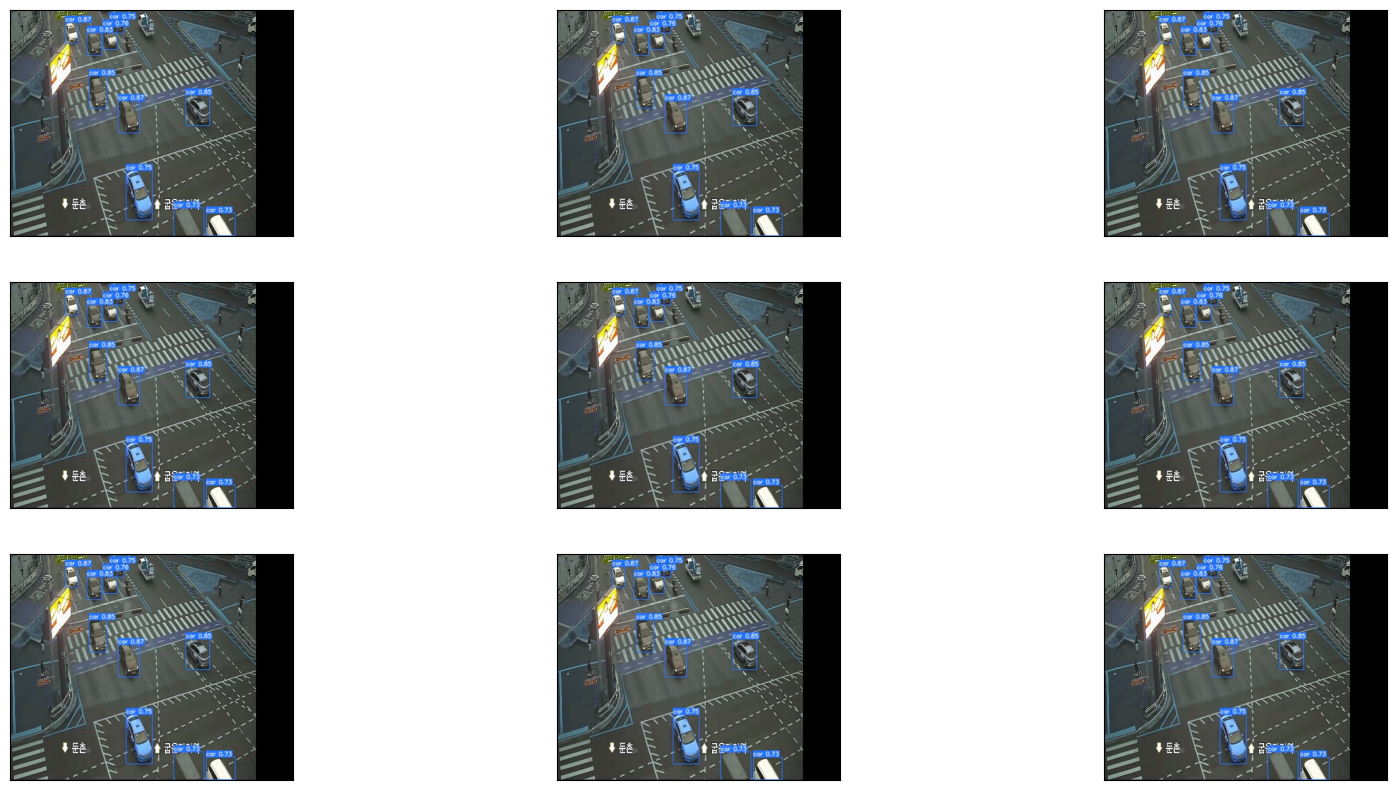

In [42]:
import matplotlib.pyplot as plt
import cv2

fig = plt.figure(figsize=(20, 10))
rows = 3
cols = 3
i= 1

for filename in img_list:

  img2 = cv2.imread(filename)

  ax = fig.add_subplot(rows, cols, i)
  ax.imshow(img2)

  # 눈금 제거
  ax.set_xticks([]), ax.set_yticks([])
  i +=1

plt.show()

- **[참조] cv2 활용하지 않고 PIL(pillow)라이브러리를 활용하여 이미지 출력하기**



```
from PIL import Image               # to load images
from IPython.display import display # to display images

detect_image_path = "/content/yolov5/runs/detect/exp"  #detect가 완료된 파일의 경로

for i in glob.glob(detect_image_path + '/*.jpg'):
  img = Image.open(i)
  img_resize = img.resize((100, 60))
  display(img_resize)
  print('\n')
```



<font color="red">**[미션10] 동영상을 소스로 한 객체 검출하기**</font>
* 경로 "TEST_VIDEO_PATH" 의 동영상파일의 객체를 검출해 보세요.
* --source 만 동영상으로 연결하면 됩니다.
* [조건]  ① IOU Threshold : 0.1, ② 모델 weights : best.pt ③ 이미지사이즈 640

In [34]:
TEST_VIDEO_PATH = "/content/drive/MyDrive/Deep_Learning_KT/project/sample/car_bike/car_bike.mp4"

In [43]:
!python detect.py --source '{TEST_VIDEO_PATH}' --weights /content/yolov5/runs/train/car_custom/weights/best.pt --img 640 --conf 0.8 --project '{ROOT_PATH}/' --name result_video_custom --exist-ok

detect: weights=['/content/yolov5/runs/train/car_custom/weights/best.pt'], source=/content/drive/MyDrive/Deep_Learning_KT/project/sample/car_bike/car_bike.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.8, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/drive/MyDrive/Deep_Learning_KT/project/sample/car_bike/, name=result_video_custom, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-227-ge4df1ec Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/274) /content/drive/MyDrive/Deep_Learning_KT/project/sample/car_bike/car_bike.mp4: 320x640 3 cars, 47.4ms
video 1/1 (2/274) /content/drive/MyDrive/Deep_Learning_KT/projec

<font color="red">**[미션11] 동영상을 확인해 화면에 출력해 보세요**</font>
* 1일차에 실행한 코드를 활용하세요  
* detect 결과에서 마지막 저장된 폴더와 파일을 확인해 주세요.
* Results saved to /content/result.../car_bike.mp4

In [44]:
detect_video = ROOT_PATH + '/result_video_custom/car_bike.mp4' # 경로 수정

# 비디오 데이터 압축 (Colab에서 실행 목적)
def video_compressing(detect_video):
  compressed_video = detect_video[:-4] + "_compressed.mp4"
  os.system(f"ffmpeg -i {detect_video} -vcodec libx264 {compressed_video}")

  return compressed_video

In [45]:
compressed_video = video_compressing(detect_video)

from IPython.display import HTML
from base64 import b64encode

mp4 = open(compressed_video,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
    <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.